<a href="https://colab.research.google.com/github/Legolas42/Python-Projects/blob/parami/Ater_%26_Khant_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Final Project for CS 210 Course**

#### Conducted by *Atermachar Joh*n & *Khant Razar Kyaw*
#### Group 3
#### Includes
- Data Import and Cleaning
- EDA
- Data Analysis & Visualization
- Linear Regression and Data Prediction



## Task 1: Data Loading & Data Cleaning

In this step, the neccesary python library will be imported to the notebook and the data would be loaded to the drive linked to the Colab notework. Moreover, the data would also be converted into pandas dataframe and checked missing data, data types, and what cleaning processes should be added on this analysis report.

In [1]:
# import pandas & numpy for analysis, matplotlib and seaborn for visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import files from colab package to upload dataset

from google.colab import files
uploaded = files.upload()

Saving user_behavior_dataset.csv to user_behavior_dataset.csv


In [3]:
# convert dataset into pandas dataframe & check first 5 rows

df = pd.read_csv('user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [63]:
# explore data types to understand data structure

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   User ID                     700 non-null    int64   
 1   Device Model                700 non-null    object  
 2   Operating System            700 non-null    object  
 3   App Usage Time (min/day)    700 non-null    int64   
 4   Screen On Time (hours/day)  700 non-null    float64 
 5   Battery Drain (mAh/day)     700 non-null    int64   
 6   Number of Apps Installed    700 non-null    int64   
 7   Data Usage (MB/day)         700 non-null    int64   
 8   Age                         700 non-null    int64   
 9   Gender                      700 non-null    object  
 10  User Behavior Class         700 non-null    int64   
 11  Age Group                   700 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 61.2+ KB


We have observed that there are a total of 11 columns, 700 data rows, and a total of 7700 cells, with all non-null values.

7 of the fields are integers, 1 is float, so numerical data columns are 8 and the rest 3 are objects and categorical.

In [62]:
# check fro missing values

df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


The missing values are rechecked and there are no missing values in the dataset.


Hence, there would not be any further subsequent actions for missing data like replacing, finding logical reasons, and normalization

### Task 1.1 - Data Addition

Since the age are hard to analyze, we will create a new column of age groups, that eqaully divided the age column into 4 age groups.

In [58]:
# Define bins and labels for the age groups
age_bins = [16, 27, 38, 49, 60]  # 4 groups with 5 bins
age_labels = ['16 to 26', '27 to 37', '38 to 48', '49 to 59']

# Add a new column for age groups
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Display the updated dataset
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class,Age Group
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4,38 to 48
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3,38 to 48
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2,38 to 48
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3,16 to 26
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3,27 to 37


In [59]:
# check fro missing values again

df.isnull().sum()

,0
User ID,0
Device Model,0
Operating System,0
App Usage Time (min/day),0
Screen On Time (hours/day),0
Battery Drain (mAh/day),0
Number of Apps Installed,0
Data Usage (MB/day),0
Age,0
Gender,0


Now, all columns have no missing values, including the age group new column.

## Task 2 - Exploratory Data Analysis (EDA)

### Task 2.1 - Summary Data Statistics

We will explore the summary data statistics and correlation of numerical data.

In [64]:
# summary statistics of dataset

df.describe()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


In [61]:
# correlation of datasets

df_numerical = df.select_dtypes(include=['float64', 'int64']) # select only float and integer data
df_numerical.corr()

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
User ID,1.000000,-0.024957,-0.014287,-0.019377,-0.023914,-0.014527,0.045188,-0.016242
App Usage Time (min/day),-0.024957,1.000000,0.950333,0.956385,0.955253,0.942308,0.004382,0.970498
Screen On Time (hours/day),-0.014287,0.950333,1.000000,0.948983,0.946975,0.941322,0.017232,0.964581
Battery Drain (mAh/day),-0.019377,0.956385,0.948983,1.000000,0.961853,0.932276,-0.002722,0.978587
Number of Apps Installed,-0.023914,0.955253,0.946975,0.961853,1.000000,0.934800,0.004034,0.981255
Data Usage (MB/day),-0.014527,0.942308,0.941322,0.932276,0.934800,1.000000,0.003999,0.946734
Age,0.045188,0.004382,0.017232,-0.002722,0.004034,0.003999,1.000000,-0.000563
User Behavior Class,-0.016242,0.970498,0.964581,0.978587,0.981255,0.946734,-0.000563,1.000000


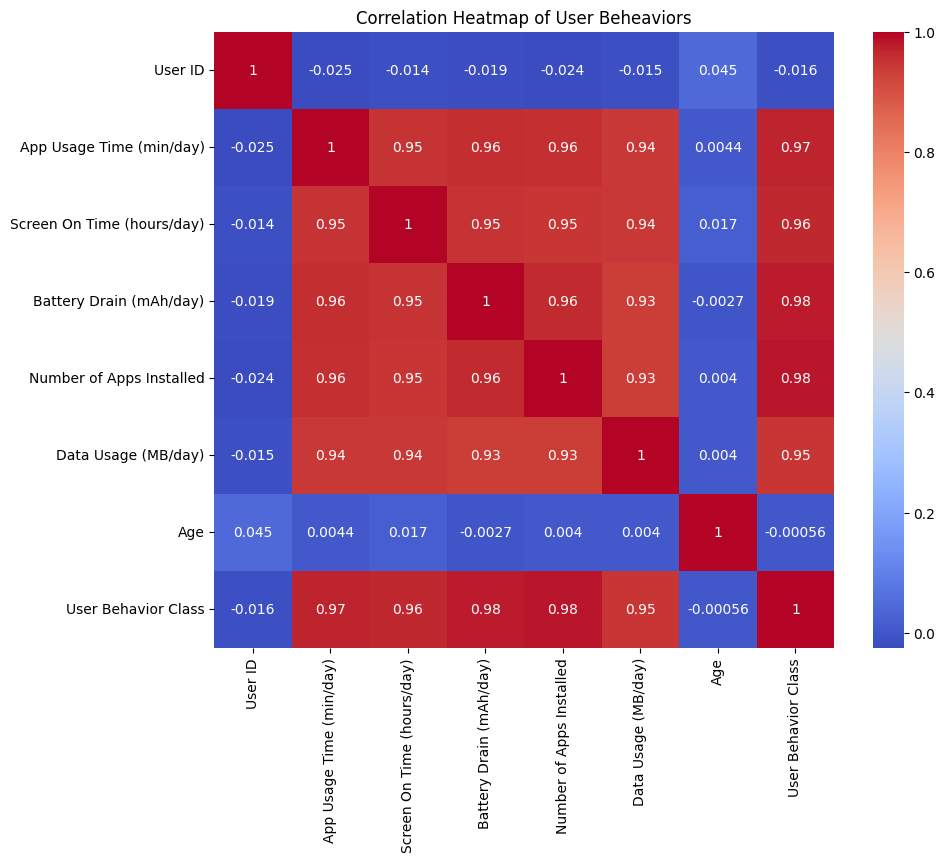

In [8]:
# correlation heatmap

plt.figure(figsize=(10, 8)) # figure size to 10 vs 8
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm') # heatmap with correlation and annotation
plt.title("Correlation Heatmap of User Beheaviors") # title of heatmap
plt.show()

What we see from the correlation is that, applicaion usage time, screen on time, battery drain, number of apps, and data usage are all correlated closely together.

However, there are no correlation to age group with those features.

So, we wonder how it would also be other categorical variables, like gender, device model, and operation system.

### Task 2.2 - User Info and Behaviors

We will explore each column of age, gender, user behaviors, operation system and device models first, and check some visualizations from them.

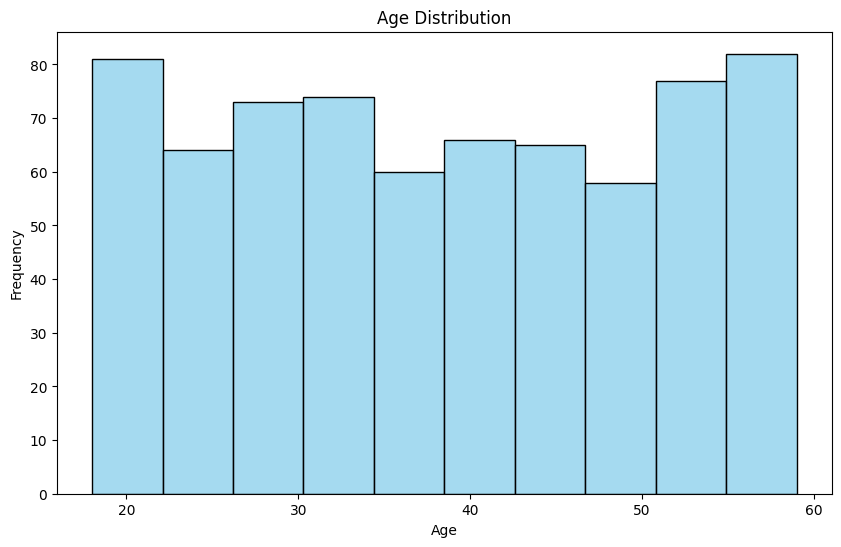

In [9]:
# Histogram of the age (with original column)

plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=10, color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

<ipython-input-66-5a0272879e98>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Age Group', data=df, palette='Set2')


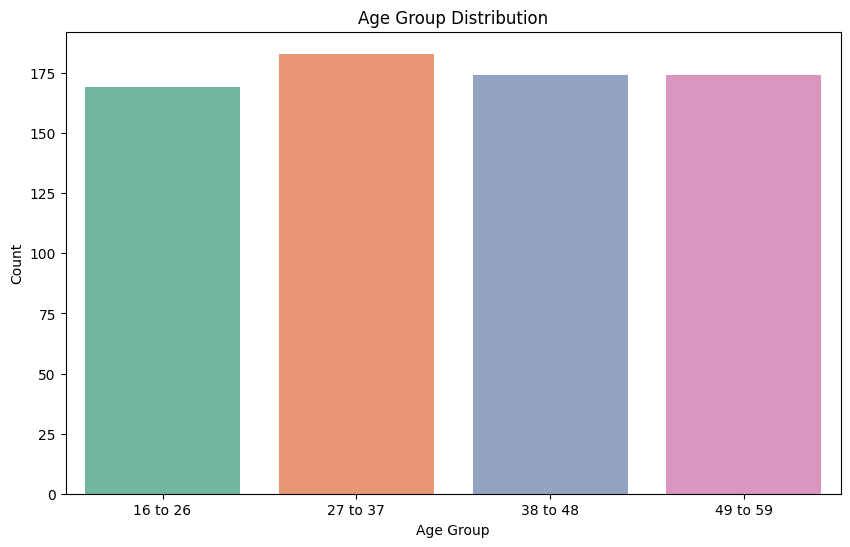

In [66]:
# Distribution of the Age Group

plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', data=df, palette='Set2')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Group Distribution')
plt.show()

<ipython-input-67-759eb16d0016>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='Set3')


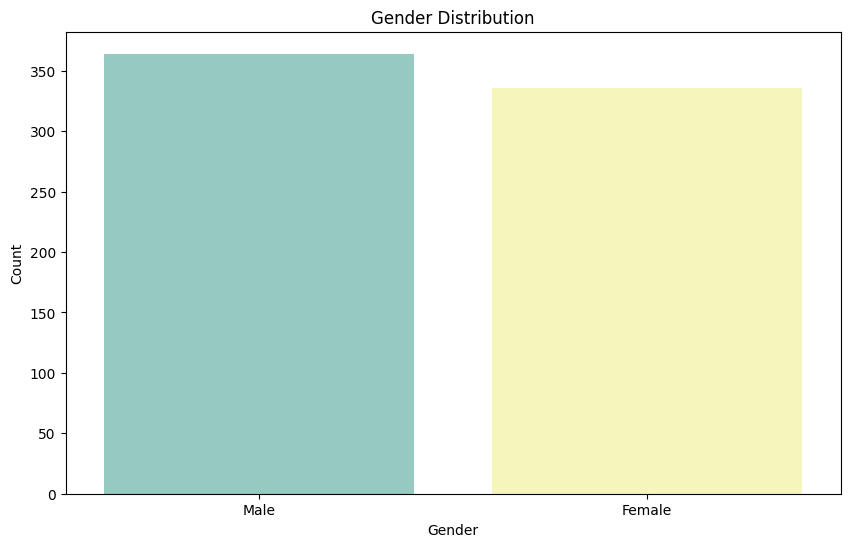

In [67]:
# the distribution of the gender

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', data=df, palette='Set3')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()


<ipython-input-69-3969f4b4eb65>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Operating System', data=df, palette='coolwarm') # palette coolwarm


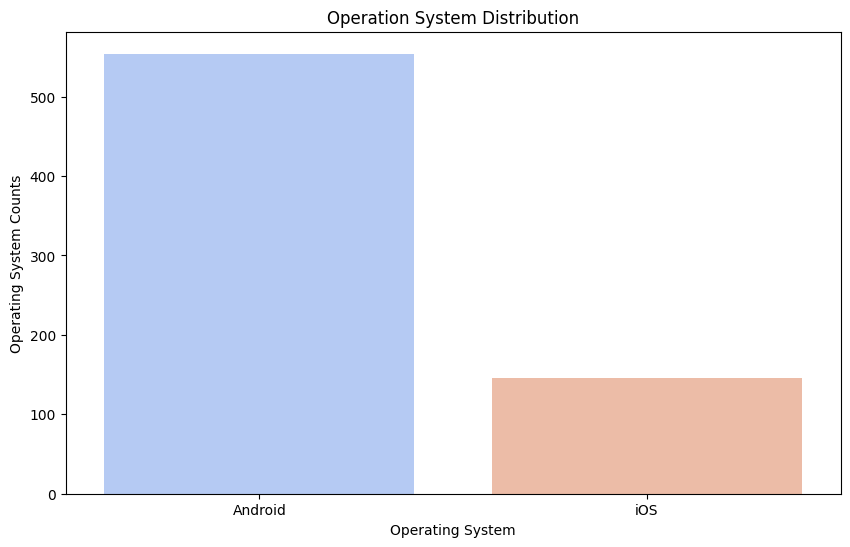

In [69]:
# Operation System distribution

fig= plt.figure(figsize=(10, 6)) # for greater size
sns.countplot(x='Operating System', data=df, palette='coolwarm') # palette coolwarm
plt.xlabel('Operating System')
plt.ylabel('Operating System Counts')
plt.title('Operation System Distribution')
plt.show()

We have observed that more Andriod OS are more common than iOS.

<ipython-input-12-876bb1c1ac9a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Device Model', data=df, palette='Set2') # palette set2


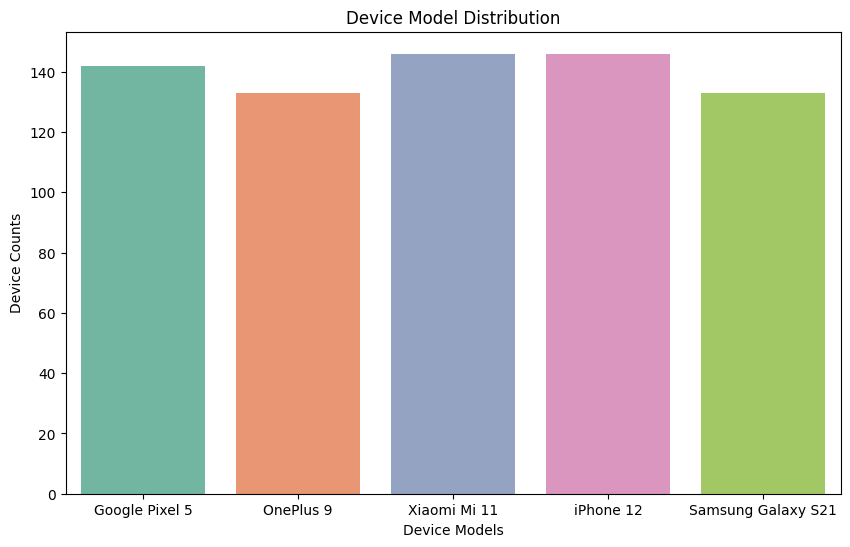

In [12]:
# Device Model distribution

fig= plt.figure(figsize=(10, 6)) # for greater size
sns.countplot(x='Device Model', data=df, palette='Set2') # palette set2
plt.xlabel('Device Models')
plt.ylabel('Device Counts')
plt.title('Device Model Distribution')
plt.show()

We have found there are five device models, Google Pixel 5, One Plus 9, Xiaomi Mi 11, iPhone 12, and Samsung Galaxy S21.

All of the categories are more or less in the similar range of counts.

### Task 2.3 - User Behavior

We will explore each column of application usage time, screen on time, battery drain, number of applications installed, and data usage, user behavior distribution.

## Task 3 - Data Analysis and Visualization

### Question 1: How do differne gender prefer the device models and Operating Systems?


We will graph two countplots of gender, with OS and Device Models.

For plot 1, OS is graphed with gender and for plot 2, device models are graphed with gender.

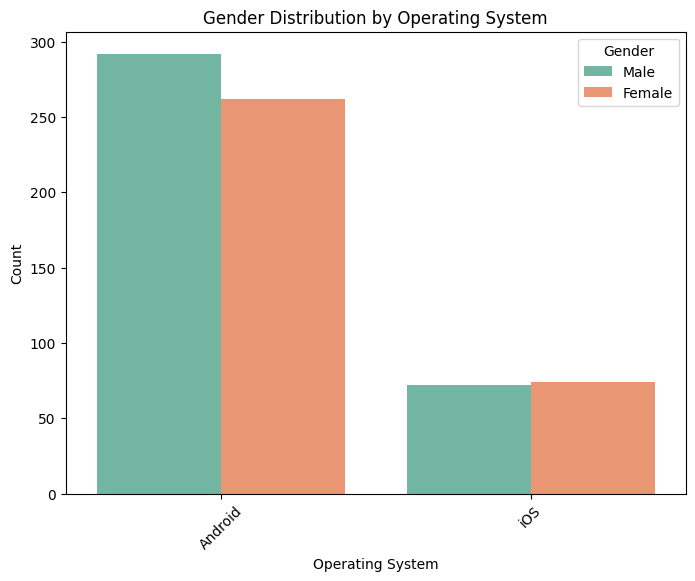

In [44]:
# Plot 1: Count Plot of Gender with Operating System

plt.figure(figsize=(8, 6))
sns.countplot(x='Operating System', hue='Gender', data=df, palette='Set2')
plt.title("Gender Distribution by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

We have observed that in iOS, male adn female ratio are similar, but a few more male use andriod than female.

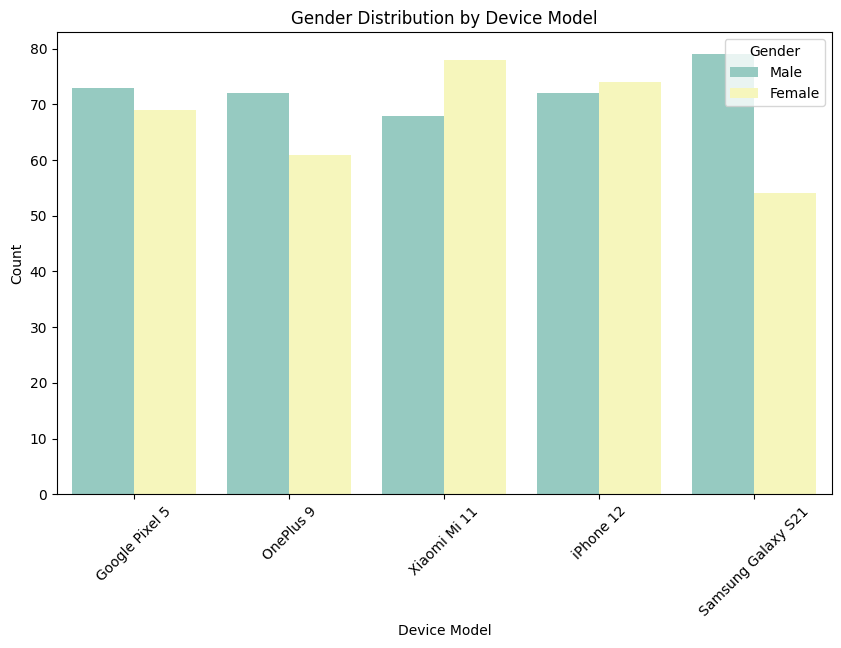

In [41]:
# Plot 2: Count Plot of Gender with Device Models

plt.figure(figsize=(10, 6))
sns.countplot(x='Device Model', hue='Gender', data=df, palette='Set3')
plt.title("Gender Distribution by Device Model")
plt.xlabel("Device Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In terms of device models, Google Pixel 5 and iPhone 12 have similar gender ratios, but OnePLus 9 and Samsung Galaxy S21 have more male users, and Xiaomi Mi 11 has more female users. Among them, Samsung Galaxy S21 have relatively male dominant than female in users.

### Question 2: How do differne gender prefer the device models and Operating Systems?

We will graph two countplots of age group, with OS and Device Models.

For plot 3, OS is graphed with age group and for plot 4, device models are graphed with age group.

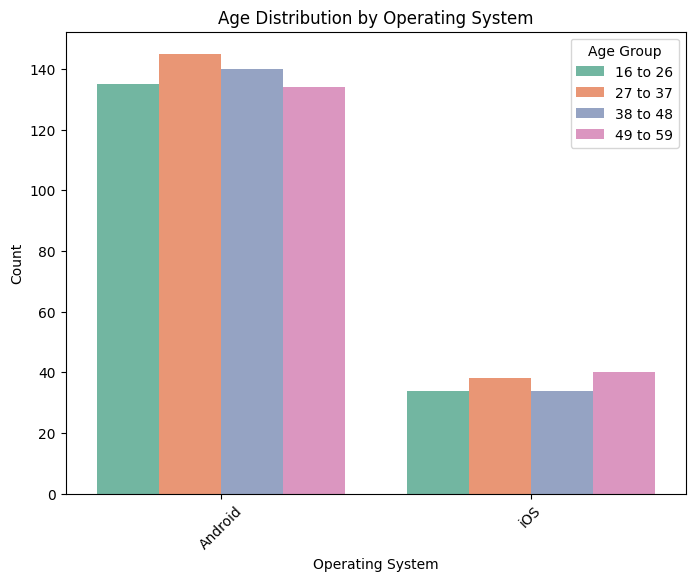

In [70]:
# Plot 3: Count Plot of Age Group with Operating System

plt.figure(figsize=(8, 6))
sns.countplot(x='Operating System', hue='Age Group', data=df, palette='Set2')
plt.title("Age Distribution by Operating System")
plt.xlabel("Operating System")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

The preference of age groups does not show a relative difference in the graph.

But, the age group 27 to 37 preferred Android most and the age group 49 to 59 like iOS most.

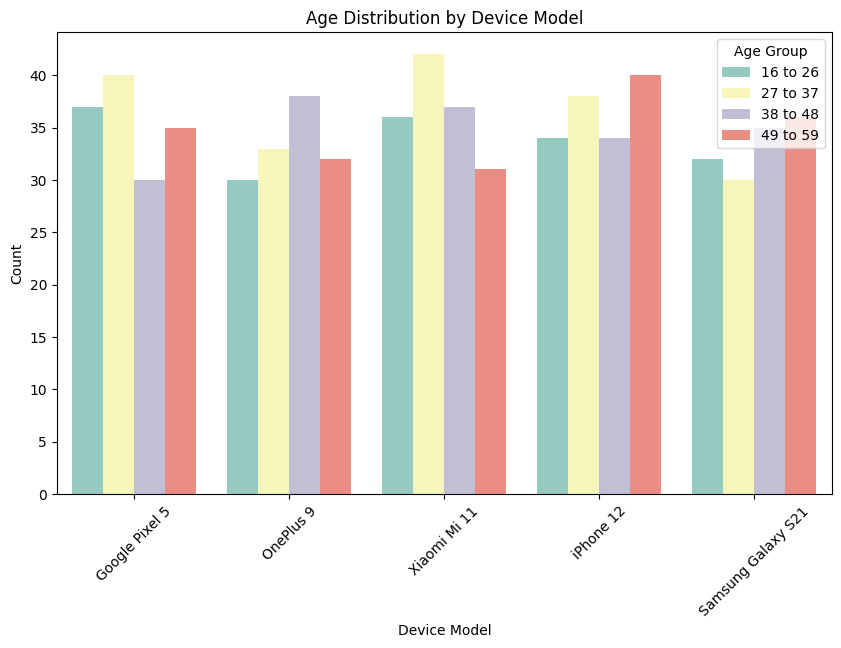

In [71]:
# Plot 4: Count PLot of Age Groups with Device Models

plt.figure(figsize=(10, 6))
sns.countplot(x='Device Model', hue='Age Group', data=df, palette='Set3')
plt.title("Age Distribution by Device Model")
plt.xlabel("Device Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Google Pixel 5 and Xiaomi Mi 11 are mostly liked by age group 27 to 37, while OnePlus 9 is popular among age group 39 to 48. Age group 49 to 59 preferred both iPhone 12 and Samsung Galaxy S21.

### Question 3 - How do user behavior is influenced by gender and age group?

([0, 1, 2, 3, 4],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5')])

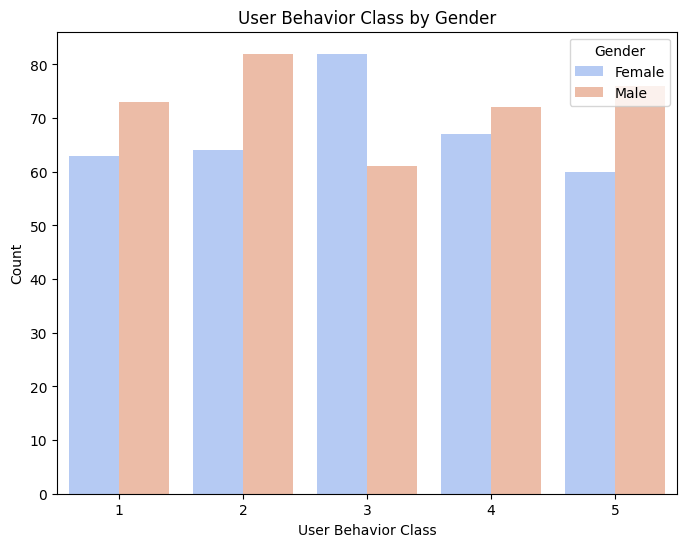

In [81]:
# a count plot of user behavior class by gender

plt.figure(figsize=(8, 6))
sns.countplot(x='User Behavior Class', hue='Gender', data=df, palette='coolwarm')
plt.title("User Behavior Class by Gender")
plt.xlabel("User Behavior Class")
plt.ylabel("Count")
plt.legend(title = "Gender")
plt.xticks(rotation=0)

We have seen that user behavior of male are more tended to have very high and very low than females, while female user have more like middle user behavior class.

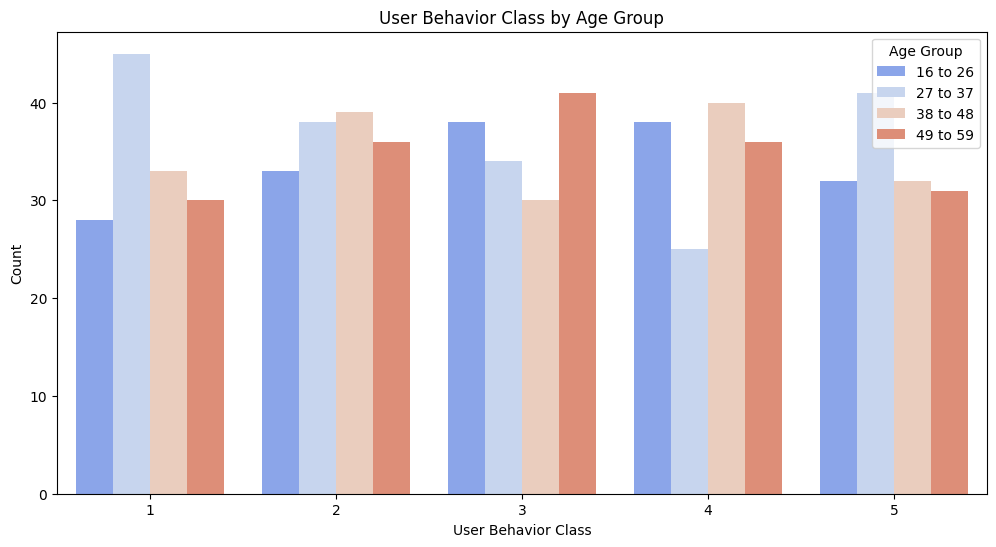

In [82]:
# a count plot of user behavior class by age group

plt.figure(figsize=(12, 6))
sns.countplot(x='User Behavior Class', hue='Age Group', data=df, palette='coolwarm')
plt.title("User Behavior Class by Age Group")
plt.xlabel("User Behavior Class")
plt.ylabel("Count")
plt.legend(title = "Age Group")
plt.xticks(rotation=0)
plt.show()

Age group 27 to 37 have very low and very high user behavior class, while age group 49 to 59 have middle user behavior class. Age group 16 to 26 and age group 38 to 48 have preferable high user behavior, too.